<a href="https://colab.research.google.com/github/Hawar-Dzaee/Language_Models/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0  Dataset
Natural Language Processing with Disaster Tweets\
Source  : kaggle https://www.kaggle.com/c/nlp-getting-started/data \
Description: a collection of Twitter messages (tweets) that have been categorized into two main groups: tweets related to disasters and tweets unrelated to disasters.

### 1.1 Download The Data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-09-30 12:54:25--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.29MB/s    in 0.4s    

2023-09-30 12:54:25 (1.29 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



### 1.2 Unzip The Data

In [ ]:
import zipfile
with zipfile.ZipFile('/content/nlp_getting_started.zip') as zip_ref:
  zip_ref.extractall()

# 2.0  Data inspection and Data wrangling

In [ ]:
import numpy as np
import pandas as pd
train_df = pd.read_csv('/content/train.csv')
test_df  = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### 2.1 shuffle the data

In [ ]:
train_df_shuffled = train_df.sample(frac =1,random_state=0)
train_df_shuffled.head()

,id,keyword,location,text,target
311,454,armageddon,Wrigley Field,@KatieKatCubs you already know how this shit g...,0
4970,7086,meltdown,Two Up Two Down,@LeMaireLee @danharmon People Near Meltdown Co...,0
527,762,avalanche,Score Team Goals Buying @,1-6 TIX Calgary Flames vs COL Avalanche Presea...,0
6362,9094,suicide%20bomb,Roadside,If you ever think you running out of choices i...,0
800,1160,blight,Laventillemoorings,If you dotish to blight your car go right ahea...,0


### 2.2 checking class balance

In [ ]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
train_df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 311 to 2732
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 356.9+ KB


### 2.3 check for missing values

In [ ]:
print(train_df_shuffled['text'].isnull().sum())  # feature
print(train_df_shuffled['target'].isnull().sum())  # label

0
0


In [ ]:
len(train_df),len(test_df)

(7613, 3263)

## train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                         train_df_shuffled['target'].to_numpy(),
                                                                         test_size = 0.1,
                                                                         random_state=42)

In [ ]:
len(train_sentences),len(val_sentences)

(6851, 762)

In [ ]:
val_labels[:2]

array([0, 1])

# 3.0 TextVectorization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

### 3.1 Preprocessing

In [ ]:
text_vectorizer = TextVectorization(max_tokens= 10_000,
                                    standardize='lower_and_strip_punctuation',
                                    split = 'whitespace',
                                    ngrams = None,
                                    output_mode = 'int',
                                    output_sequence_length=15, # truncate if it's more than 15, pad if it's <15
                                    pad_to_max_tokens=True)

### 3.2 Adapt: fitting the train_sentences

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
# eg
text_vectorizer(['In search of Lost Time'])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   4, 1258,    6,  875,   89,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

### 3.3 get_vocabulary: for unique words

In [ ]:
text_vectorizer.get_vocabulary() # lists from most common to the least

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'it',
 'with',
 'that',
 'at',
 'by',
 'this',
 'from',
 'are',
 'be',
 'was',
 'have',
 'like',
 'up',
 'as',
 'just',
 'but',
 'so',
 'me',
 'im',
 'amp',
 'your',
 'not',
 'its',
 'out',
 'all',
 'after',
 'when',
 'will',
 'no',
 'has',
 'an',
 'if',
 'we',
 'fire',
 'get',
 'now',
 'new',
 'about',
 'what',
 'more',
 'via',
 'he',
 'dont',
 'been',
 'they',
 'or',
 'news',
 'over',
 'one',
 'how',
 'people',
 'who',
 'into',
 'us',
 'video',
 'were',
 'do',
 '2',
 'can',
 'disaster',
 'emergency',
 'there',
 'police',
 'than',
 'her',
 'his',
 'some',
 'would',
 'still',
 'body',
 'storm',
 'burning',
 'back',
 'why',
 'california',
 'time',
 'them',
 'suicide',
 'day',
 'got',
 'man',
 'first',
 'know',
 'had',
 'buildings',
 'crash',
 'off',
 'nuclear',
 'bomb',
 'love',
 'going',
 'world',
 'see',
 'our',
 'rt',
 'cant',
 'train',
 'attack',
 'youtube',
 'go',
 'two',
 'dead',


# 4.0 Embedding

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
embedding = layers.Embedding(input_dim = 10_000 , # max_vocab_length (setting input_shape)
                             output_dim = 128,    #                  (setting output shape)
                             embeddings_initializer='uniform', # default, initialize randomly
                             input_length = 15)

embedding

In [ ]:
# eg
embedding(text_vectorizer('In search of Lost Time '))[1]  # embedding of word 'search'

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.04041485,  0.04064578, -0.04110335, -0.04500611,  0.02764568,
       -0.03613391,  0.01088287,  0.02864676,  0.01364789,  0.04862897,
        0.03574023,  0.04652173, -0.04122937, -0.02925955,  0.03815642,
        0.0468995 , -0.01319392, -0.00608879, -0.00316501,  0.04157827,
        0.02221796,  0.04440938, -0.04121836,  0.00082737, -0.00102226,
       -0.02167121,  0.04778894, -0.04147389,  0.02140671,  0.00308583,
        0.04964102, -0.04115548,  0.00106889,  0.04894083,  0.01959098,
       -0.04863235,  0.02462626,  0.00735426,  0.03939659,  0.03534645,
        0.0010092 ,  0.02433008, -0.01455846,  0.01548746, -0.00702054,
       -0.02844869, -0.03011581,  0.03949824,  0.0476363 ,  0.03564194,
        0.02162689,  0.0391641 ,  0.0152552 , -0.00096397,  0.00984512,
        0.02077417, -0.04881427,  0.01620029,  0.03421075,  0.01065887,
       -0.01597319,  0.04351968,  0.0097848 , -0.01932026, -0.01669098,
       -0.034449

# 5.0 Models

### 5.1 Model 0: naive_bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clf',MultinomialNB())
])

model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences,val_labels)
print(baseline_score)

0.8280839895013123


In [ ]:
baseline_predict = model_0.predict(val_sentences)
baseline_predict[:20]

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
# prompt: confusion matrix with sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true= val_labels,y_pred= baseline_predict)
cm

array([[401,  17],
       [114, 230]])

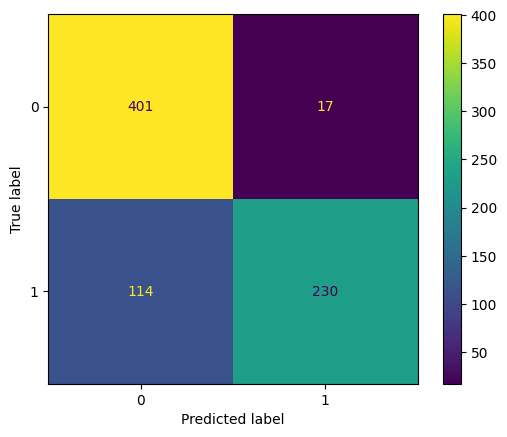

In [ ]:
# prompt: plot ConfusionMatrixDisplay

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_predict)
baseline_results

{'accuracy': 82.80839895013123,
 'precision': 0.8475009597111159,
 'recall': 0.8280839895013123,
 'f1': 0.8229125071805021}

### 5.2 Model_1: A Simple Dense Model

In [ ]:
from tensorflow.keras import layers

In [ ]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs,outputs,name= 'model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_4  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)               

In [ ]:
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_1_history = model_1.fit(x=train_sentences,
                              y= train_labels,
                              epochs=10,
                              validation_data=(val_sentences,val_labels))

Epoch 1/10
215/215 [==============================] - 6s 27ms/step - loss: 0.0292 - accuracy: 0.9837 - val_loss: 2.0463 - val_accuracy: 0.7297
Epoch 2/10
215/215 [==============================] - 5s 24ms/step - loss: 0.0282 - accuracy: 0.9845 - val_loss: 2.2130 - val_accuracy: 0.7310
Epoch 3/10
215/215 [==============================] - 5s 22ms/step - loss: 0.0285 - accuracy: 0.9839 - val_loss: 2.2367 - val_accuracy: 0.7388
Epoch 4/10
215/215 [==============================] - 4s 21ms/step - loss: 0.0280 - accuracy: 0.9850 - val_loss: 2.2990 - val_accuracy: 0.7297
Epoch 5/10
215/215 [==============================] - 5s 25ms/step - loss: 0.0278 - accuracy: 0.9837 - val_loss: 2.3352 - val_accuracy: 0.7231
Epoch 6/10
215/215 [==============================] - 4s 21ms/step - loss: 0.0274 - accuracy: 0.9841 - val_loss: 2.5128 - val_accuracy: 0.7283
Epoch 7/10
215/215 [==============================] - 5s 22ms/step - loss: 0.0275 - accuracy: 0.9841 - val_loss: 2.3865 - val_accuracy: 0.7375

In [ ]:
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 1.6388 - accuracy: 0.7375


[1.638771653175354, 0.7375327944755554]

In [ ]:
model_1_pred = model_1.predict(val_sentences)
model_1_pred[:5]

24/24 [==============================] - 0s 4ms/step


array([[0.02244001],
       [0.56780136],
       [0.00887505],
       [0.37760293],
       [1.        ]], dtype=float32)

### 5.3 Model_2: LSTM

In [ ]:
inputs = tf.keras.Input(shape=(1,),dtype='string')
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.LSTM(64)(x)
x= layers.Dense(128,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs,name= 'model_2_LSTM')


In [ ]:
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_accuracy',patience=5)

In [ ]:
model_2.fit(train_sentences,
            train_labels,
            epochs= 30,
            validation_data = (val_sentences,val_labels),
            callbacks = [early_stopping]
              )

Epoch 1/30
215/215 [==============================] - 12s 43ms/step - loss: 0.0833 - accuracy: 0.9701 - val_loss: 1.2349 - val_accuracy: 0.7559
Epoch 2/30
215/215 [==============================] - 8s 38ms/step - loss: 0.0340 - accuracy: 0.9825 - val_loss: 1.6367 - val_accuracy: 0.7323
Epoch 3/30
215/215 [==============================] - 7s 34ms/step - loss: 0.0299 - accuracy: 0.9837 - val_loss: 1.8342 - val_accuracy: 0.7362
Epoch 4/30
215/215 [==============================] - 8s 39ms/step - loss: 0.0326 - accuracy: 0.9831 - val_loss: 2.0710 - val_accuracy: 0.7336
Epoch 5/30
215/215 [==============================] - 8s 35ms/step - loss: 0.0285 - accuracy: 0.9844 - val_loss: 1.9203 - val_accuracy: 0.7375
Epoch 6/30
215/215 [==============================] - 8s 38ms/step - loss: 0.0275 - accuracy: 0.9842 - val_loss: 2.5600 - val_accuracy: 0.7244


In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                      

### 5.4 Model_3: GRU

In [ ]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.GRU(64)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_3 = keras.Model(inputs,outputs,name='model_3_GRU')

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
model_3.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
model_3_history= model_3.fit(train_sentences,
                            train_labels,
                            epochs=50,
                            validation_data=(val_sentences,val_labels),
                             callbacks = [early_stopping])

Epoch 1/50
215/215 [==============================] - 8s 38ms/step - loss: 0.0460 - accuracy: 0.9825 - val_loss: 1.1318 - val_accuracy: 0.7323
Epoch 2/50
215/215 [==============================] - 7s 33ms/step - loss: 0.0364 - accuracy: 0.9823 - val_loss: 1.5413 - val_accuracy: 0.7270
Epoch 3/50
215/215 [==============================] - 8s 39ms/step - loss: 0.0366 - accuracy: 0.9828 - val_loss: 1.3554 - val_accuracy: 0.7362
Epoch 4/50
215/215 [==============================] - 8s 38ms/step - loss: 0.0306 - accuracy: 0.9845 - val_loss: 1.4440 - val_accuracy: 0.7349
Epoch 5/50
215/215 [==============================] - 7s 33ms/step - loss: 0.0294 - accuracy: 0.9834 - val_loss: 1.7521 - val_accuracy: 0.7283
Epoch 6/50
215/215 [==============================] - 8s 39ms/step - loss: 0.0318 - accuracy: 0.9845 - val_loss: 1.6761 - val_accuracy: 0.7362
Epoch 7/50
215/215 [==============================] - 7s 33ms/step - loss: 0.0328 - accuracy: 0.9835 - val_loss: 1.6649 - val_accuracy: 0.7270

In [ ]:
model_3.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 12ms/step - loss: 2.0069 - accuracy: 0.7270


[2.0068845748901367, 0.7270340919494629]

In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:5]

24/24 [==============================] - 0s 5ms/step


array([[0.00413976],
       [0.85310894],
       [0.01546322],
       [0.9991945 ],
       [0.99999106]], dtype=float32)

In [ ]:
model_3_preds = tf.round(model_3_pred_probs)

In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

### 5.5 Model_4: Bidirectional

In [ ]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x= embedding(x)
x= layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x= layers.Bidirectional(layers.LSTM(64,))(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_4 = keras.Model(inputs,outputs,name='model_4_bidirectional')

In [ ]:
model_4.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
from keras.src.backend import eager_learning_phase_scope
histroy_4 = model_4.fit(train_sentences,
                            train_labels,
                            epochs=50,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[early_stopping])

Epoch 1/50
215/215 [==============================] - 39s 182ms/step - loss: 0.0354 - accuracy: 0.9838 - val_loss: 1.7341 - val_accuracy: 0.7441
Epoch 2/50
215/215 [==============================] - 15s 69ms/step - loss: 0.0324 - accuracy: 0.9829 - val_loss: 1.3653 - val_accuracy: 0.7349
Epoch 3/50
215/215 [==============================] - 15s 69ms/step - loss: 0.0310 - accuracy: 0.9845 - val_loss: 1.7056 - val_accuracy: 0.7231
Epoch 4/50
215/215 [==============================] - 17s 78ms/step - loss: 0.0306 - accuracy: 0.9837 - val_loss: 1.9871 - val_accuracy: 0.7428
Epoch 5/50
215/215 [==============================] - 16s 73ms/step - loss: 0.0290 - accuracy: 0.9850 - val_loss: 1.8584 - val_accuracy: 0.7375
Epoch 6/50
215/215 [==============================] - 16s 74ms/step - loss: 0.0292 - accuracy: 0.9848 - val_loss: 1.6963 - val_accuracy: 0.7388


### 5.6 Moel_5: Conv1D

In [ ]:
embedding_text = embedding(text_vectorizer(['this is a test sentence','here is another sentence']))

conv_1d = layers.Conv1D(filters=32,kernel_size=5,padding='same',strides=1,activation='relu')
# filters == output_dim , kernel_size == n-gram
# paddin = 'valid' it means no padding
conv_1_output = conv_1d(embedding_text)

max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1_output)

embedding_text.shape , conv_1_output.shape , max_pool_output.shape

(TensorShape([2, 15, 128]), TensorShape([2, 15, 32]), TensorShape([2, 32]))

In [ ]:
embedding_text

In [ ]:
inputs = layers.Input(shape=(1,),dtype=tf.string)
#__________________________________________________________#
x = text_vectorizer(inputs)
x = embedding(x)
#__________________________________________________________#
x = layers.Conv1D(filters=32,kernel_size=5,strides=1,padding='valid',activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
#__________________________________________________________#
outputs = layers.Dense(1,activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs,outputs,name='model_5_Conv1D')


# compile
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_9 (Dense)             (None, 1)              

In [ ]:
model_5.fit(train_sentences,
            train_labels,
            validation_data = (val_sentences,val_labels),
            epochs=50,
            callbacks = [early_stopping])

Epoch 1/50
215/215 [==============================] - 6s 22ms/step - loss: 0.0919 - accuracy: 0.9707 - val_loss: 1.1772 - val_accuracy: 0.7415
Epoch 2/50
215/215 [==============================] - 5s 24ms/step - loss: 0.0557 - accuracy: 0.9778 - val_loss: 1.3927 - val_accuracy: 0.7178
Epoch 3/50
215/215 [==============================] - 4s 20ms/step - loss: 0.0474 - accuracy: 0.9796 - val_loss: 1.4930 - val_accuracy: 0.7349
Epoch 4/50
215/215 [==============================] - 4s 21ms/step - loss: 0.0417 - accuracy: 0.9804 - val_loss: 1.6494 - val_accuracy: 0.7454
Epoch 5/50
215/215 [==============================] - 5s 23ms/step - loss: 0.0387 - accuracy: 0.9823 - val_loss: 1.6651 - val_accuracy: 0.7362
Epoch 6/50
215/215 [==============================] - 4s 21ms/step - loss: 0.0413 - accuracy: 0.9816 - val_loss: 1.7247 - val_accuracy: 0.7375
Epoch 7/50
215/215 [==============================] - 5s 23ms/step - loss: 0.0372 - accuracy: 0.9807 - val_loss: 1.7703 - val_accuracy: 0.7362

### 5.7 Model_6 : Pretrained Embeddings

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed(['what doesnt kill you makes you stronger'])
embed_samples

In [ ]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape= [],
                                        dtype = tf.string,
                                        trainable=False,
                                        name = 'USE')

In [ ]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(512,activation= 'relu'),
    layers.Dense(512,activation= 'relu'),
    layers.Dense(1,activation = 'sigmoid')
], name = 'Pretrained_Embeddings')

In [ ]:
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_6.summary()

Model: "Pretrained_Embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 dense_16 (Dense)            (None, 1)                 513       
                                                                 
Total params: 257323649 (981.61 MB)
Trainable params: 525825 (2.01 MB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
history_6 = model_6.fit(train_sentences,
            train_labels,
            epochs= 50,
            validation_data=(val_sentences,val_labels),
            callbacks = [early_stopping]
            )

Epoch 1/50
215/215 [==============================] - 8s 38ms/step - loss: 0.0233 - accuracy: 0.9904 - val_loss: 1.4184 - val_accuracy: 0.8110
Epoch 2/50
215/215 [==============================] - 4s 19ms/step - loss: 0.0212 - accuracy: 0.9921 - val_loss: 1.4623 - val_accuracy: 0.7927
Epoch 3/50
215/215 [==============================] - 4s 20ms/step - loss: 0.0181 - accuracy: 0.9926 - val_loss: 1.5083 - val_accuracy: 0.8018
Epoch 4/50
215/215 [==============================] - 5s 22ms/step - loss: 0.0197 - accuracy: 0.9923 - val_loss: 1.4179 - val_accuracy: 0.7992
Epoch 5/50
215/215 [==============================] - 4s 18ms/step - loss: 0.0181 - accuracy: 0.9934 - val_loss: 1.4214 - val_accuracy: 0.7966
Epoch 6/50
215/215 [==============================] - 4s 20ms/step - loss: 0.0126 - accuracy: 0.9933 - val_loss: 1.5083 - val_accuracy: 0.7940


In [ ]:
model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 28ms/step - loss: 1.5083 - accuracy: 0.7940


[1.5082709789276123, 0.7939632534980774]